## Prepare MOdel on Texting Mining
For Text Mining assignment


1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)



In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("Elon_musk.csv", encoding = 'latin-1')

In [ ]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## EDA--->Exploratory Data Analysis.....And Cleanig A Data..

In [ ]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:

df.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [ ]:
df[df.duplicated()].shape

(0, 2)

In [ ]:
df.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Data Preprocessing

In [ ]:
import nltk

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
string.punctuation
import re

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Covering")

'cover'

In [ ]:
def datapre(text):
    text=text.lower()
    text=re.sub('\[.*?\]', "",text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [ ]:
df["Text_Transform1"]=df["Text"].apply(datapre)

In [ ]:
df

,Text,Text_Transform1
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is


In [ ]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]#We Cant Assign Directly into text to y we  have to do clonning here.....text=y We cant Do Here.we will clonning like this text=y[:]
    y.clear()

    for i in text:
        if i not in  stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " " .join(y)

In [ ]:
df["Text_Transform2"]=df["Text_Transform1"].apply(transform_text)

In [ ]:
df

,Text,Text_Transform1,Text_Transform2
0,@kunalb11 Im an alien,im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,joerogan spotify great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,teslacn congratulations tesla china amazing ex...
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,flcnhvy true sounds surreal negative propagand...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,ppathole make sure read ur terms amp condition...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,ppathole altho dumb dumber


In [ ]:
def transform_text2(text):
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        y.append(ps.stem(i))

    return " " .join(y)

In [ ]:
df["Text_Transform3"]=df["Text_Transform2"].apply(transform_text2)

In [ ]:
df

,Text,Text_Transform1,Text_Transform2,Text_Transform3
0,@kunalb11 Im an alien,im an alien,alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray tracing cyberpunk hdr nextleve...,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,joerogan spotify great interview,joerogan spotifi great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,teslacn congratulations tesla china amazing ex...,teslacn congratul tesla china amaz execut last...
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,flcnhvy true sounds surreal negative propagand...,flcnhvi true sound surreal neg propaganda stil...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,ppathole make sure read ur terms amp condition...,ppathol make sure read ur term amp condit clic...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,teslagong ppathole samwise gamgee,teslagong ppathol samwis gamge
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,ppathole altho dumb dumber,ppathol altho dumb dumber


In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def polarity(Text_Transform):
    return TextBlob(Text_Transform).sentiment.polarity

In [ ]:
df["polarity"]=df["Text_Transform3"].apply(polarity)

In [ ]:
df

,Text,Text_Transform1,Text_Transform2,Text_Transform3,polarity
0,@kunalb11 Im an alien,im an alien,alien,alien,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray tracing cyberpunk hdr nextleve...,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,joerogan spotify great interview,joerogan spotifi great interview,0.800000
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,doge underestim,0.000000
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,teslacn congratulations tesla china amazing ex...,teslacn congratul tesla china amaz execut last...,0.000000
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,flcnhvy true sounds surreal negative propagand...,flcnhvi true sound surreal neg propaganda stil...,0.186667
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,ppathole make sure read ur terms amp condition...,ppathol make sure read ur term amp condit clic...,0.500000
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,teslagong ppathole samwise gamgee,teslagong ppathol samwis gamge,0.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is,ppathole altho dumb dumber,ppathol altho dumb dumber,-0.375000


In [ ]:
df1=df.drop(df.columns[[0,1,2]],axis=1)

In [ ]:
df1

,Text_Transform3,polarity
0,alien,-0.250000
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000
2,joerogan spotifi great interview,0.800000
3,doge underestim,0.000000
4,teslacn congratul tesla china amaz execut last...,0.000000
...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667
1995,ppathol make sure read ur term amp condit clic...,0.500000
1996,teslagong ppathol samwis gamge,0.000000
1997,ppathol altho dumb dumber,-0.375000


In [ ]:
def sentiment(m):
    if m<0:
        return "negative"
    elif m>0:
        return "positive"
    else:
        return "neutral"

In [ ]:
df1["sentiment"]=df1["polarity"].apply(sentiment)

In [ ]:
df1

,Text_Transform3,polarity,sentiment
0,alien,-0.250000,negative
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,neutral
2,joerogan spotifi great interview,0.800000,positive
3,doge underestim,0.000000,neutral
4,teslacn congratul tesla china amaz execut last...,0.000000,neutral
...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667,positive
1995,ppathol make sure read ur term amp condit clic...,0.500000,positive
1996,teslagong ppathol samwis gamge,0.000000,neutral
1997,ppathol altho dumb dumber,-0.375000,negative


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment', ylabel='count'>

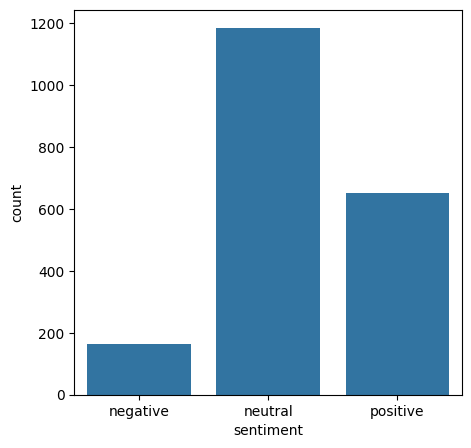

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=df1)

Text(0.5, 1.0, 'Distribution Of Sentiments')

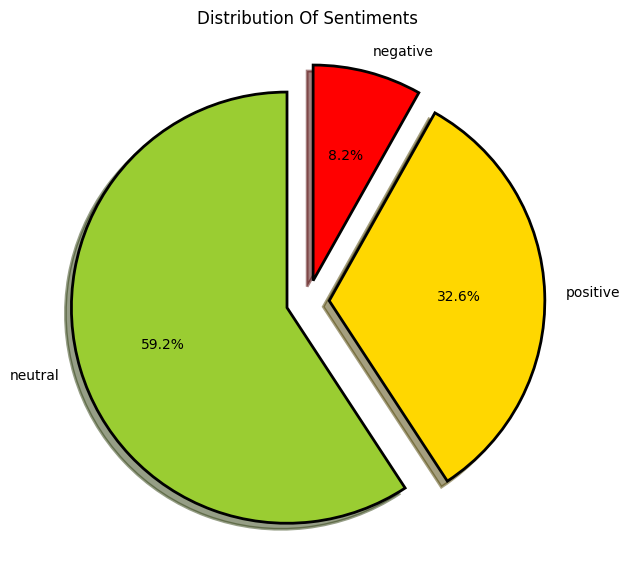

In [ ]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags=df1["sentiment"].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Distribution Of Sentiments")

In [ ]:
df1

,Text_Transform3,polarity,sentiment
0,alien,-0.250000,negative
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,neutral
2,joerogan spotifi great interview,0.800000,positive
3,doge underestim,0.000000,neutral
4,teslacn congratul tesla china amaz execut last...,0.000000,neutral
...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667,positive
1995,ppathol make sure read ur term amp condit clic...,0.500000,positive
1996,teslagong ppathol samwis gamge,0.000000,neutral
1997,ppathol altho dumb dumber,-0.375000,negative


In [ ]:
import sys
print(sys.executable)
from wordcloud import WordCloud

wc=WordCloud(width=1600,height=500,min_font_size=10,background_color="black")

/usr/bin/python3


In [ ]:
positive_tweets=wc.generate(df1[df1['sentiment']=="positive"]["Text_Transform3"].str.cat(sep=" "))
positive_tweets

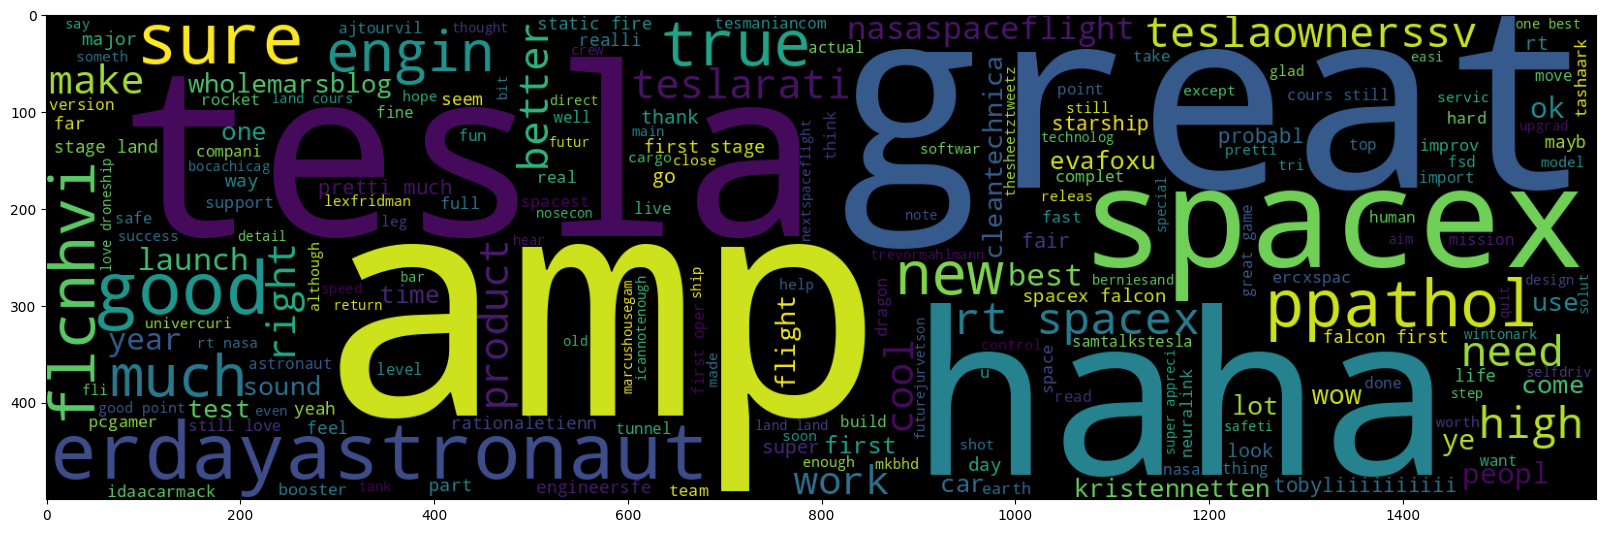

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(positive_tweets)

In [ ]:
negative_tweets=wc.generate(df1[df1['sentiment']=="negative"]["Text_Transform3"].str.cat(sep=" "))
negative_tweets

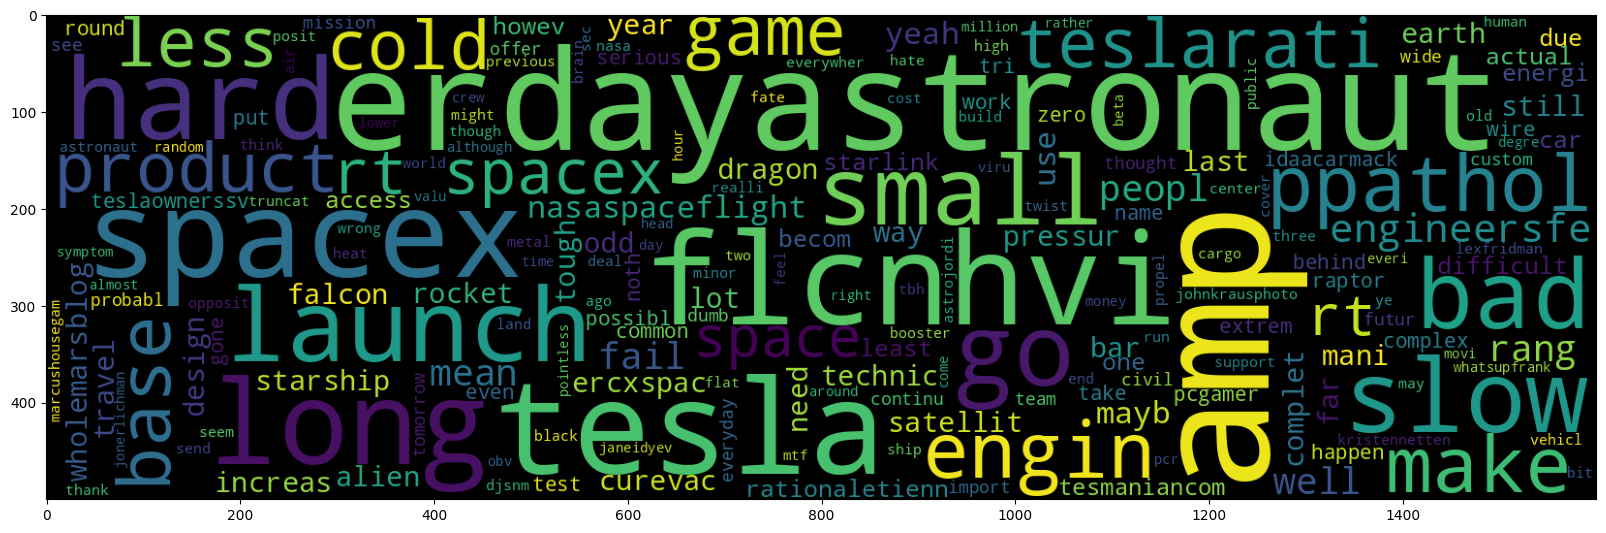

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(positive_tweets)

In [ ]:
neutral_tweets=wc.generate(df1[df1['sentiment']=="neutral"]["Text_Transform3"].str.cat(sep=" "))
neutral_tweets

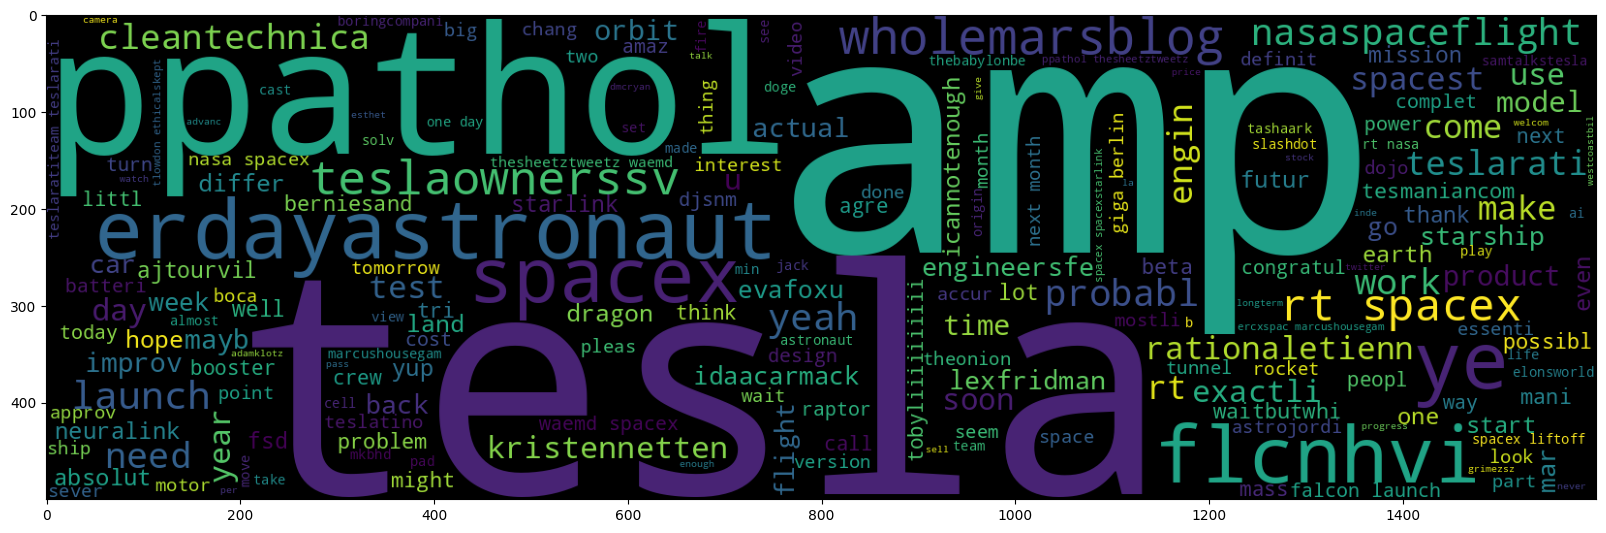

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(positive_tweets)

In [ ]:
## This iS For Positive Tweets...

Po_tweets=[]
for msg in df1[df1["sentiment"]=="positive"]["Text_Transform3"].tolist():
    for word in msg.split():
        Po_tweets.append(word)

In [ ]:
len(Po_tweets)

5066

In [ ]:
## This iS For Negative Tweets Tweets...

Ne_tweets=[]
for msg in df1[df1["sentiment"]=="negative"]["Text_Transform3"].tolist():
    for word in msg.split():
        Ne_tweets.append(word)


In [ ]:
len(Ne_tweets)

1467

In [ ]:
## This iS For Neutral Tweets Tweets...

Neu_tweets=[]
for msg in df1[df1["sentiment"]=="nutral"]["Text_Transform3"].tolist():
    for word in msg.split():
        Neu_tweets.append(word)


In [ ]:

len(Neu_tweets)

0

## Model Building......

In [ ]:
df1

,Text_Transform3,polarity,sentiment
0,alien,-0.250000,negative
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,neutral
2,joerogan spotifi great interview,0.800000,positive
3,doge underestim,0.000000,neutral
4,teslacn congratul tesla china amaz execut last...,0.000000,neutral
...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667,positive
1995,ppathol make sure read ur term amp condit clic...,0.500000,positive
1996,teslagong ppathol samwis gamge,0.000000,neutral
1997,ppathol altho dumb dumber,-0.375000,negative


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1["sentiment"]=LE.fit_transform(df1["sentiment"])

In [ ]:
df1

,Text_Transform3,polarity,sentiment
0,alien,-0.250000,0
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,1
2,joerogan spotifi great interview,0.800000,2
3,doge underestim,0.000000,1
4,teslacn congratul tesla china amaz execut last...,0.000000,1
...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667,2
1995,ppathol make sure read ur term amp condit clic...,0.500000,2
1996,teslagong ppathol samwis gamge,0.000000,1
1997,ppathol altho dumb dumber,-0.375000,0


<Axes: >

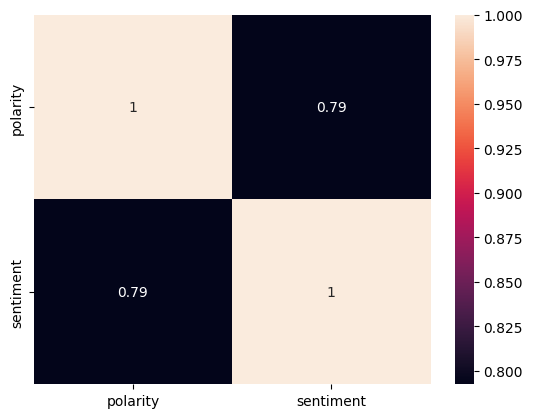

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df1["Text_Transform3"]).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(1999, 3706)

In [ ]:
Y=df1["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print("Size of X_train",(X_train.shape))
print("Size of X_test",(X_test.shape))
print("Size of Y_train",(Y_train.shape))
print("Size of Y_test",(Y_test.shape))

Size of X_train (1599, 3706)
Size of X_test (400, 3706)
Size of Y_train (1599,)
Size of Y_test (400,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred=LR.predict(X_test)
LR_Accuracy_test=accuracy_score(Y_pred,Y_test)
print("Accuracy Score of Test",LR_Accuracy_test.round(2))

Accuracy Score of Test 0.78


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
clf = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    }

In [ ]:
def result(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    return accuracy

In [ ]:
result(etc,X_train,Y_train,X_test,Y_test)

0.9275

In [ ]:
accuracy_scores = []

for name,clf in clf.items():
    current_accuracy= result(clf, X_train,Y_train,X_test,Y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.8275
For  KN
Accuracy -  0.585
For  NB
Accuracy -  0.7525
For  DT
Accuracy -  0.6975
For  LR
Accuracy -  0.785
For  RF
Accuracy -  0.905
For  AdaBoost
Accuracy -  0.895
For  BgC
Accuracy -  0.9175
For  ETC
Accuracy -  0.9275
For  GBDT
Accuracy -  0.8325


In [ ]:
performance_df=pd.DataFrame({"Accuracy_Score":accuracy_scores})

In [ ]:
performance_df

,Accuracy_Score
0,0.8275
1,0.5850
2,0.7525
3,0.6975
4,0.7850
5,0.9050
6,0.8950
7,0.9175
8,0.9275
9,0.8325


In [ ]:
performance_df1 = pd.melt(performance_df)
performance_df1

,variable,value
0,Accuracy_Score,0.8275
1,Accuracy_Score,0.5850
2,Accuracy_Score,0.7525
3,Accuracy_Score,0.6975
4,Accuracy_Score,0.7850
5,Accuracy_Score,0.9050
6,Accuracy_Score,0.8950
7,Accuracy_Score,0.9175
8,Accuracy_Score,0.9275
9,Accuracy_Score,0.8325


In [ ]:
! pip install future


In [ ]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib

%matplotlib inline

In [ ]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [ ]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [ ]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example